## REGRESIÓN MULTILINEAL

Es posible hallar una función lineal respecto a cada una de las variables independientes

$$ y = \beta_0 + \beta_1x1 +\beta_2 x2 + \beta_3 x3 ... \beta_n xn$$

#### Evaluación de los supuestos del modelo
En el contexto del análisis lineal, la evaulación de los supuestos del modelo de Regresión Múltiple es un paso crítico para asegurarse de que el modelo se ajuste adecuadamente a los datos y que los resultados sean válidos y confiables.

- **Linealidad:** Cada una de las variables independientes será lineal con respecto a la variable dependiete. Se verifica con gráfica de dispersión o mediante prueblas estadísticas.

- **Homocedasticidad**
Residuso(Diferencia entre la distancia del valor esperado y el valor real)
La dispersión de esos residuos debe ser constante en todos los niveles de las variables independientes. Se puede evaluar mediante gráficos de residuos

  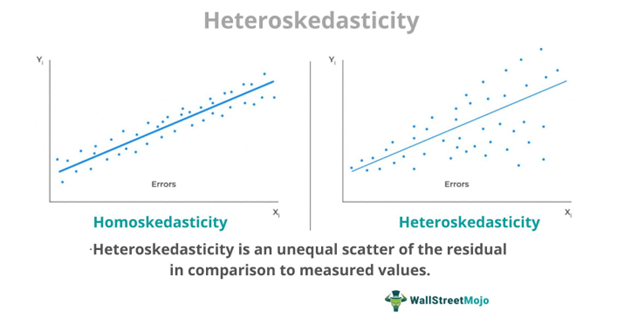

- **Independencia de los residuos**
Los residuops no deben mostrar patrones sistemáticos o autocorrelación temporal. Se puede verificar mediante pruebas de autocorrelación.

- **Normalidad de los residuos** 
Los residuos deben seguir una distribución normal. Se evalua meidnate prubas estadísticas o gráficos de normalidad.

- **Ausencia de multicolinealidad**
Las variables independientes deben ser independientes entre sí. La multicolinealidad puede afectar la interpretación de los coeficinetes. Se puede evaluar mediante pruebas estadísticas y el cálculo de la matriz de correlación.

### Análisis de residuos

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [3]:
df = sns.load_dataset('car_crashes')

In [4]:
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


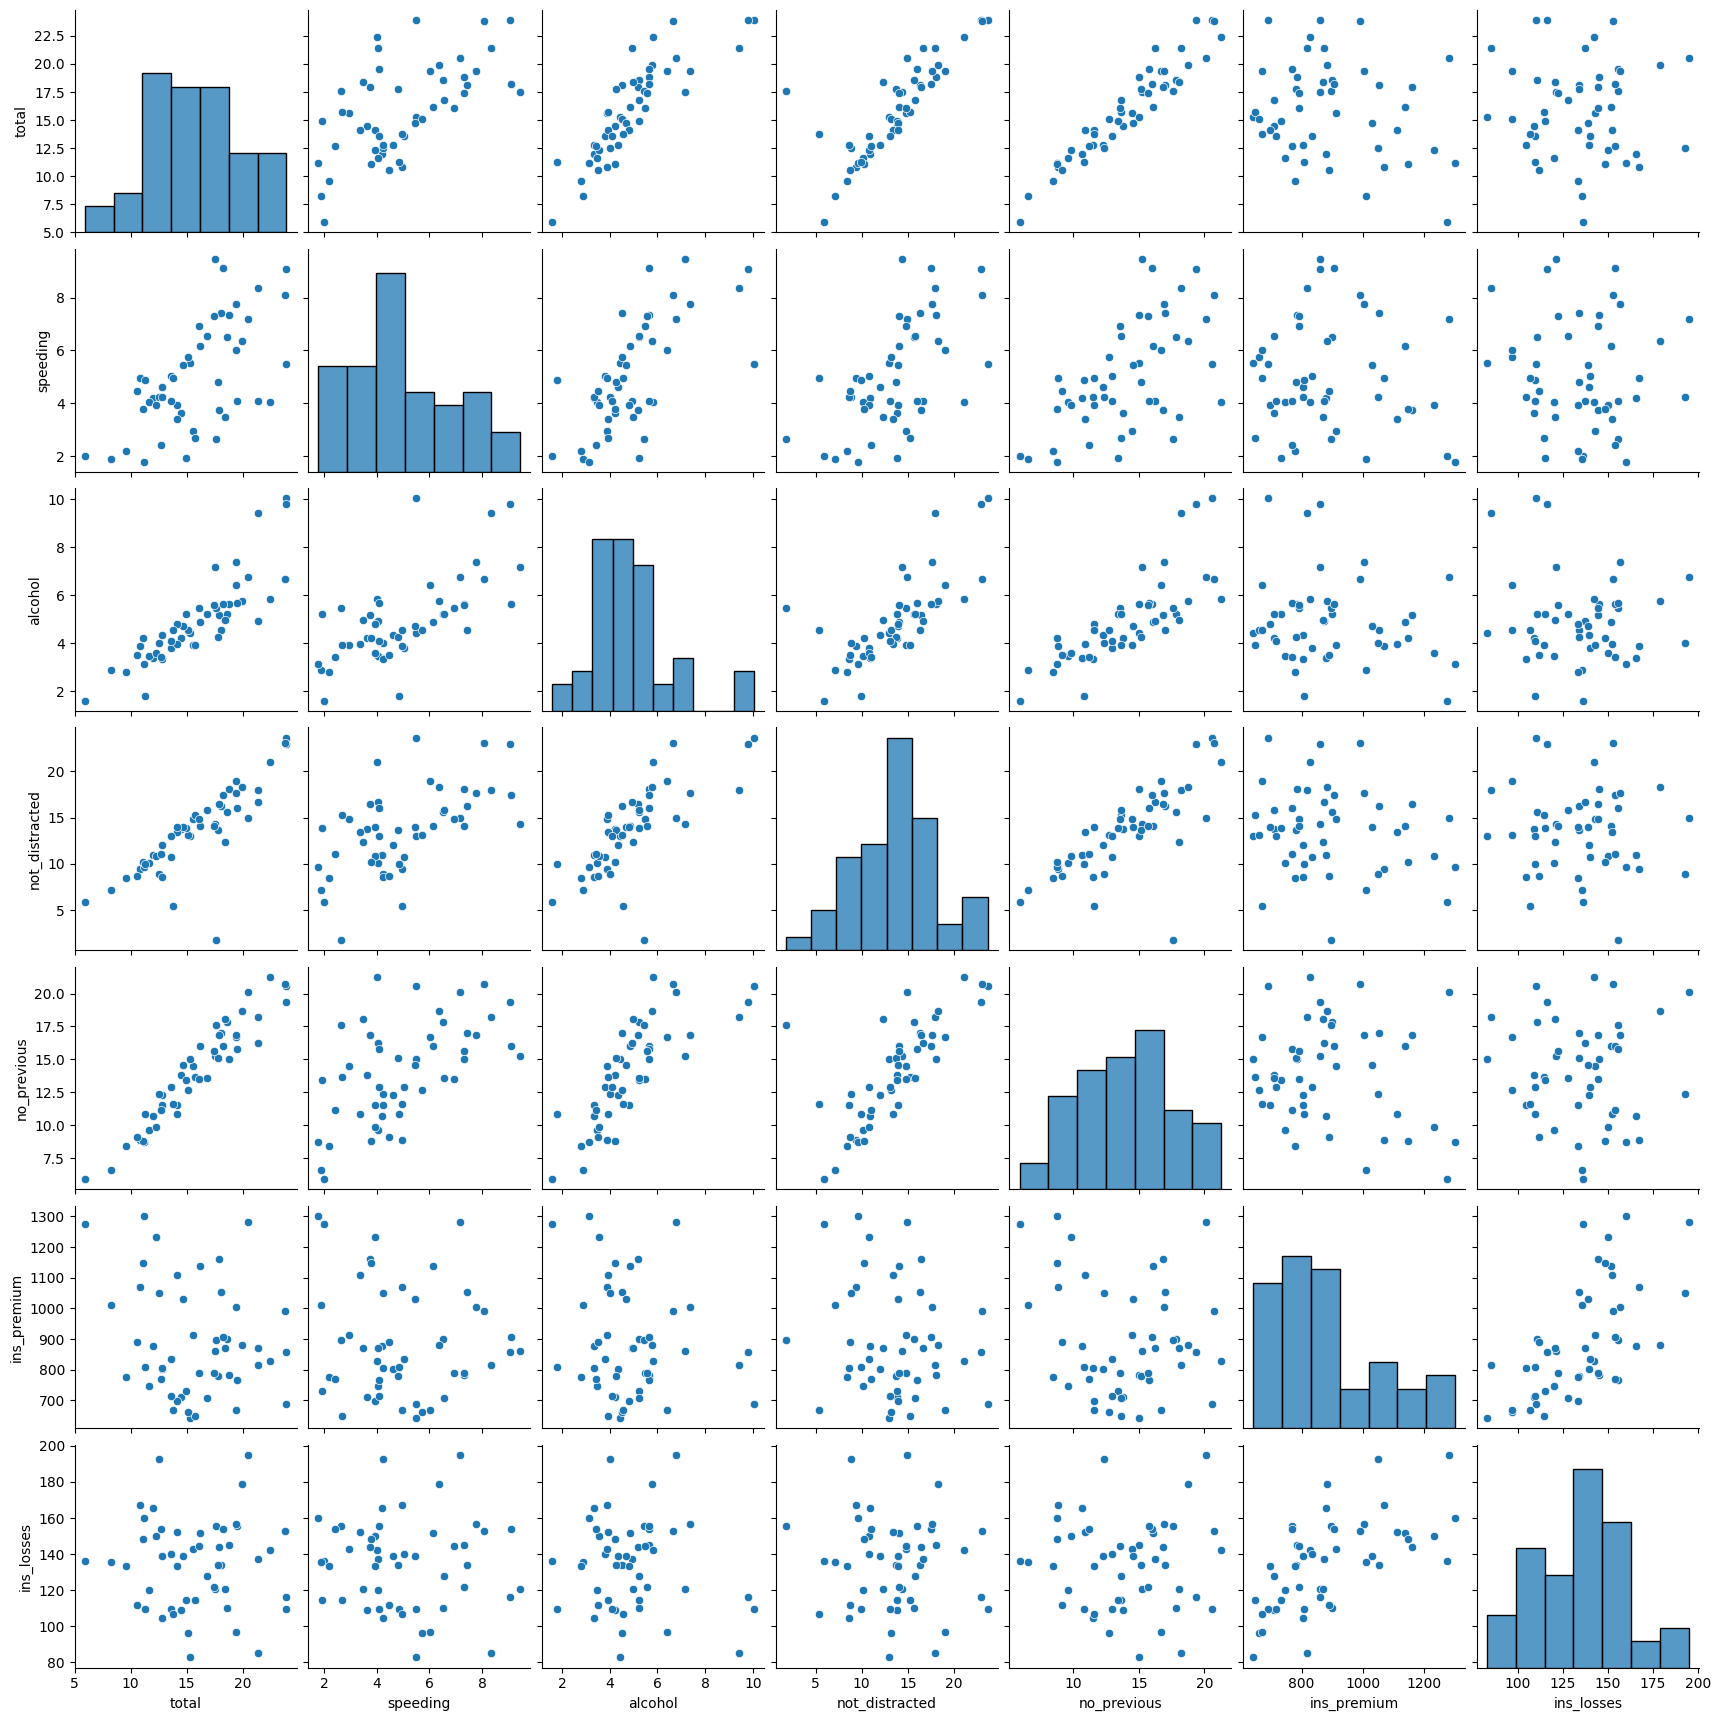

In [5]:
sns.pairplot(df)
plt.show()

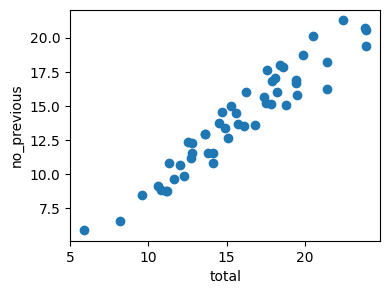

In [9]:
plt.figure(figsize=(4,3))
plt.scatter(df.total, df.no_previous)
plt.xlabel('total')
plt.ylabel('no_previous')
plt.show()

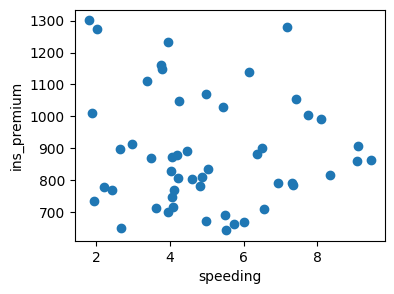

In [10]:
plt.figure(figsize=(4,3))
plt.scatter(df.speeding, df.ins_premium)
plt.xlabel('speeding')
plt.ylabel('ins_premium')
plt.show()

#### Regresiones lineales

Modelo 1

In [20]:
x1 = df.total.values.copy().reshape(-1, 1)

In [21]:
y1 = df.no_previous.values.copy()

In [22]:
model1 = LinearRegression()
model1.fit(x1, y1)

LinearRegression()

In [23]:
m1 = model1.coef_[0].round(3)
b1 = model1.intercept_.round(3)
r2_1 = model1.score(x1, y1).round(3)

print(f'm = {m1}')
print(f'b = {b1}')
print(f'r2_1 = {r2_1}')

m = 0.873
b = 0.215
r2_1 = 0.914


Modelo2

In [24]:
x2= df.speeding.values.copy().reshape(-1, 1)
y2 = df.ins_premium.values.copy()

model2 = LinearRegression()
model2.fit(x2, y2)

LinearRegression()

In [26]:
m2 = model2.coef_[0].round(3)
b2 = model2.intercept_.round(3)
r2_2 = model2.score(x2, y2).round(3)

print(f'm = {m2}')
print(f'b = {b2}')
print(f'r2_2 = {r2_2}')

m = -6.864
b = 921.263
r2_2 = 0.006


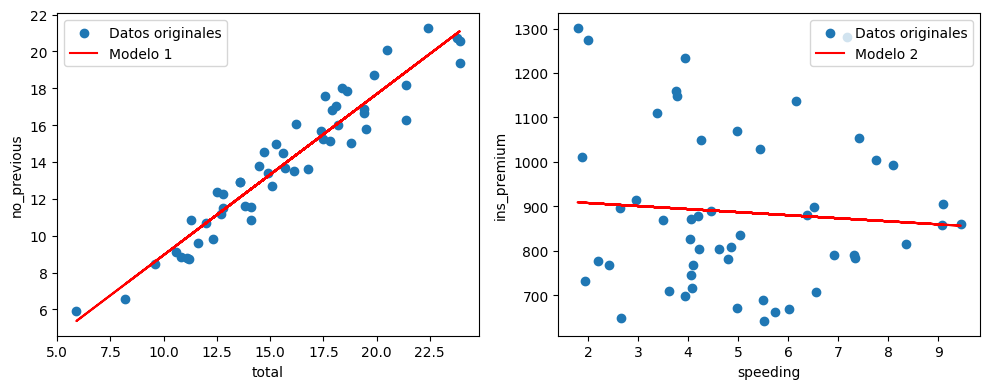

In [35]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(x1, y1, label='Datos originales')
plt.plot(x1, model1.predict(x1), color='red', label='Modelo 1')
plt.xlabel('total')
plt.ylabel('no_previous')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(x2, y2, label='Datos originales')
plt.plot(x2, model2.predict(x2), color='red', label='Modelo 2')
plt.xlabel('speeding')
plt.ylabel('ins_premium')
plt.legend(loc = 1)

plt.tight_layout()
plt.show()

Cálculo de residuos

In [41]:
res1 = y1 - model1.predict(x1)
res2 = y2 - model2.predict(x2)

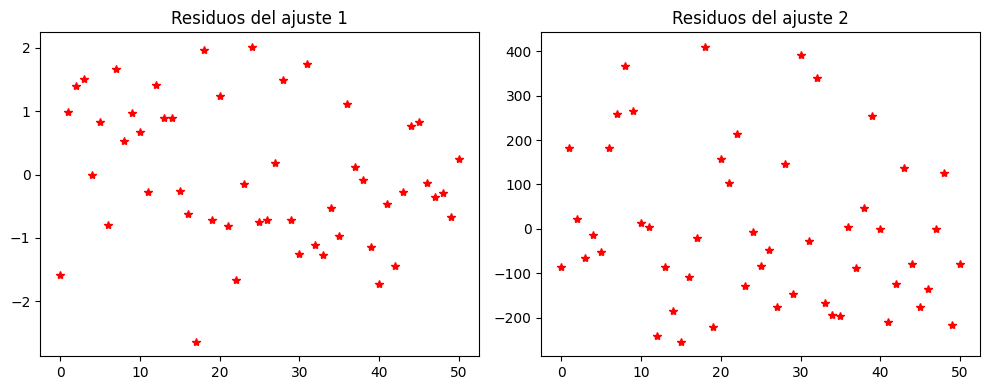

In [42]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Residuos del ajuste 1')
plt.plot(res1, 'r*')

plt.subplot(1,2,2)
plt.title('Residuos del ajuste 2')
plt.plot(res2, 'r*')

plt.tight_layout()
plt.show()

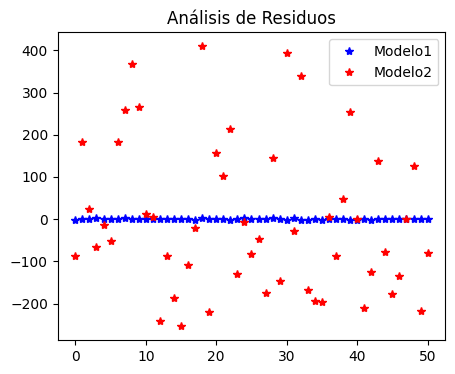

In [43]:
plt.figure(figsize= (5,4))
plt.title('Análisis de Residuos')
plt.plot(res1, 'b*', label='Modelo1')
plt.plot(res2, 'r*', label= 'Modelo2')
plt.legend()

plt.show()

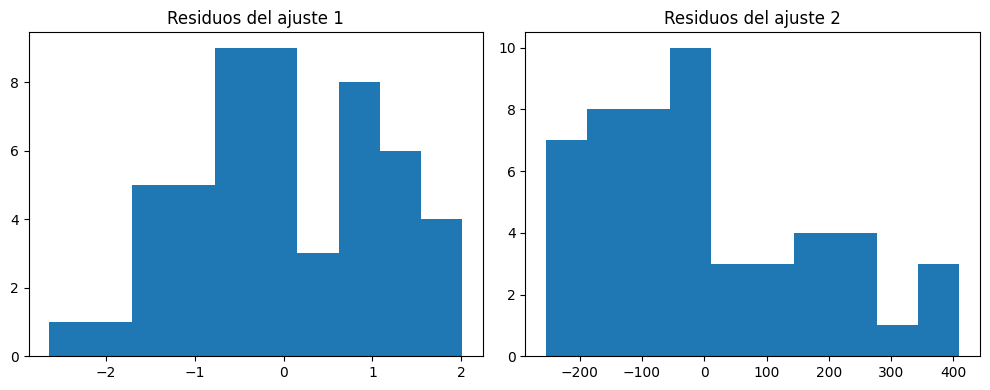

In [44]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Residuos del ajuste 1')
plt.hist(res1)

plt.subplot(1,2,2)
plt.title('Residuos del ajuste 2')
plt.hist(res2)

plt.tight_layout()
plt.show()

In [45]:
rango1 = res1.max() - res1.min()
rango2 = res2.max() - res2.min()

res1_norm = res1 / rango1
res2_norm = res2 / rango2

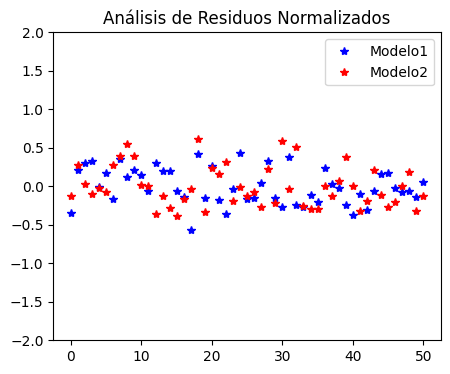

In [46]:
plt.figure(figsize= (5,4))
plt.title('Análisis de Residuos Normalizados')
plt.plot(res1_norm, 'b*', label='Modelo1')
plt.plot(res2_norm, 'r*', label= 'Modelo2')
plt.ylim(-2, 2)
plt.legend()
plt.show()

#### Regresión Multilineal

$$ y = \beta_0 + \beta_1x1 + \beta_2x2 $$

Ejercicio: 

$$ y = 3 + x_1 + 2 x_2 $$

In [47]:
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3], [0, 0], [3, 2], [2, 1], [0, 2], [1, 3], [2, 0]])
X

array([[1, 1],
       [1, 2],
       [2, 2],
       [2, 3],
       [0, 0],
       [3, 2],
       [2, 1],
       [0, 2],
       [1, 3],
       [2, 0]])

In [48]:
y = 3 + np.dot(X, np.array([1, 2])) #y = 3 + x_1 + 2 x_2
y

array([ 6,  8,  9, 11,  3, 10,  7,  7, 10,  5])

Puntos en el plano

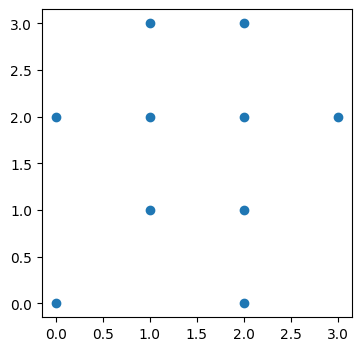

In [49]:
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1])
plt.show()

Gráfica 3d

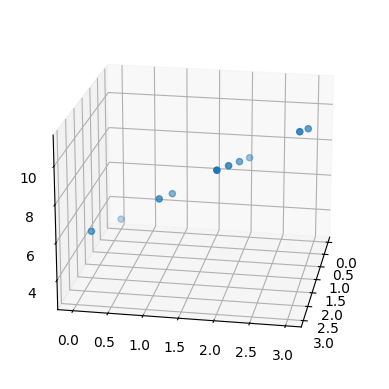

In [55]:
elev, azim = 20, 10 # en grados

fig = plt.figure()
ax = fig.add_subplot(projection= '3d')

ax.scatter(X[:,0], X[:,1], y)
ax.view_init(elev = elev, azim= azim)
plt.show()

In [56]:
model3 = LinearRegression()
model3.fit(X, y)

LinearRegression()

$$ y = 3 + x_1 + 2 x_2 $$

In [57]:
model3.coef_

array([1., 2.])

In [59]:
model3.intercept_.round(1)

3.0

In [60]:
model3.score(X, y)

1.0

In [65]:
c1, c2 = 1, 2
b = 3

cx = np.linspace(min(X[:,0]), max(X[:,0]))
cy = np.linspace(min(X[:,1]), max(X[:,1]))

cx, cy = np.meshgrid(cx, cy)
eq = b + c1 * cx +c2 * cy

In [66]:
print(cx)

[[0.         0.06122449 0.12244898 ... 2.87755102 2.93877551 3.        ]
 [0.         0.06122449 0.12244898 ... 2.87755102 2.93877551 3.        ]
 [0.         0.06122449 0.12244898 ... 2.87755102 2.93877551 3.        ]
 ...
 [0.         0.06122449 0.12244898 ... 2.87755102 2.93877551 3.        ]
 [0.         0.06122449 0.12244898 ... 2.87755102 2.93877551 3.        ]
 [0.         0.06122449 0.12244898 ... 2.87755102 2.93877551 3.        ]]


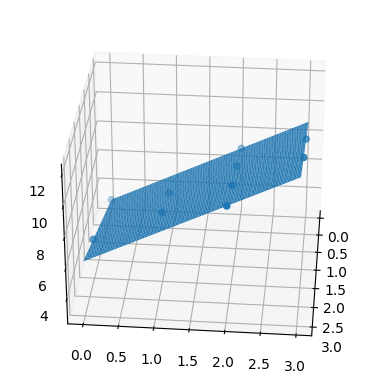

In [69]:
elev, azim = 30, 5 # en grados

fig = plt.figure()
ax = fig.add_subplot(projection= '3d')

ax.scatter(X[:,0], X[:,1], y)
ax.plot_surface(cx, cy, eq)
ax.view_init(elev = elev, azim= azim)
plt.show()